In [2]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
torch.manual_seed(1)
import os,csv,math, sys,joblib
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection, sklearn.preprocessing

In [3]:
# Loading the dataset
dataset = pd.read_csv('Iris_Dataset.csv')
dataset = pd.get_dummies(dataset, columns=['Species']) # One Hot Encoding
values = list(dataset.columns.values)

y = dataset[values[-3:]]
y = np.array(y, dtype='float32')
X = dataset[values[:-3]]
X = np.array(X, dtype='float32')

# Shuffle Data
indices = np.random.choice(len(X), len(X), replace=False)
X_values = X[indices]

scaler = joblib.load('scaler.pkl') 
X_values = scaler.transform(X_values)
y_values = y[indices]

class_name = {0:"Iris-setosa",1:"Iris-versicolor",2:"Iris-virginica"}

setosa = np.array([i[1] for i in enumerate(X_values) if int(np.where(y_values[i[0]] == 1.0)[0]) == 0])
versicolor = np.array([i[1] for i in enumerate(X_values) if int(np.where(y_values[i[0]] == 1.0)[0]) == 1])
virginica = np.array([i[1] for i in enumerate(X_values) if int(np.where(y_values[i[0]] == 1.0)[0]) == 2])

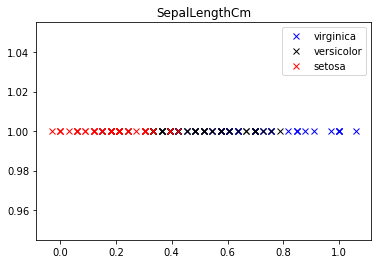

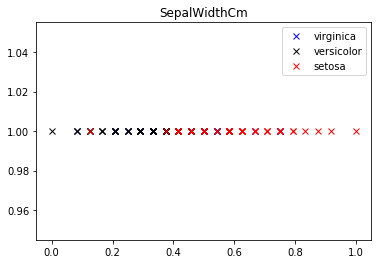

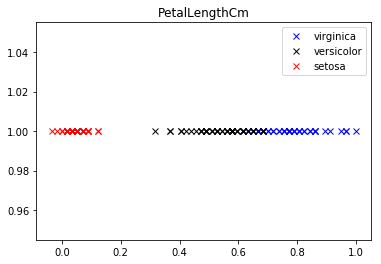

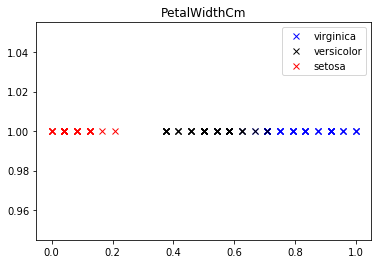

<Figure size 432x288 with 0 Axes>

In [5]:
for feature in range(X_values.shape[1]):
    #plt.scatter(np.arange(setosa.shape[0]), setosa[:,feature], color="k")
    #plt.scatter(np.arange(setosa.shape[0]), versicolor[:,feature], color="r")
    #plt.scatter(np.arange(setosa.shape[0]), virginica[:,feature], color="b")
    plt.title(values[feature])
    
    plt.plot(virginica[:,feature], np.zeros_like(virginica[:,feature]) + 1.0, 'x', color="b", label="virginica")
    plt.plot(versicolor[:,feature], np.zeros_like(versicolor[:,feature]) + 1.0, 'x', color="k", label="versicolor")
    plt.plot(setosa[:,feature], np.zeros_like(setosa[:,feature]) + 1.0, 'x', color="r", label="setosa")
    plt.legend()
    plt.show()
    plt.clf()